# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [48]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import statistics
from numpy import set_printoptions
import datetime
from dateutil.parser import parse
from datetime import datetime
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rc
%config InlineBackend.figure_format = 'retina' # Plotting Pretty figures and avoiding blurry images
sns.set_context('notebook') # Larger scale for plots in notebooks
from skimpy import skim

# Plotting Pretty figures and avoiding blurry images
%config InlineBackend.figure_format = 'retina'

# Larger scale for plots in notebooks
sns.set_context('notebook')

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df = pd.read_csv('df_train.csv')
# expand all the columns 
pd.set_option('display.max_columns', 500) 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


## BASIC ANALYSIS

In [3]:
# Check the first five rows of the dataset
df.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0                0.0           1.000000                 0.0       223.333333   
1                0.0           1.000000                 0.0       221.000000   
2                0.0           1.000000                 0.0       214.333333   
3                0.0           1.000000                 0.0       199.666667   
4                2.0           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0             sp25              0.0   
1            3.333333                0.0             sp25              0.0   
2            2.666667                0.0             sp25              0.0   
3            4.000000                0.0             sp25              0.0   
4            3.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4                NaN        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0   

Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

- 'time'
- 'Madrid_wind_speed'
- 'Valencia_wind_deg'
- 'Bilbao_rain_1h' 
- 'Valencia_wind_speed'
- 'Seville_humidity'
- 'Madrid_humidity' 
- 'Bilbao_clouds_all'
- 'Bilbao_wind_speed',
- 'Seville_clouds_all' 
- 'Bilbao_wind_deg' 
- 'Barcelona_wind_speed'
- 'Barcelona_wind_deg'
- 'Madrid_clouds_all'
- 'Seville_wind_speed'
- 'Barcelona_rain_1h'
- 'Seville_pressure'
- 'Seville_rain_1h'
- 'Bilbao_snow_3h'
- 'Barcelona_pressure'
- 'Seville_rain_3h'
- 'Madrid_rain_1h'
- 'Barcelona_rain_3h'
- 'Valencia_snow_3h',
- 'Madrid_weather_id'
- 'Barcelona_weather_id'
- 'Bilbao_pressure',
- 'Seville_weather_id'
- 'Valencia_pressure'
- 'Seville_temp_max'
- 'Madrid_pressure'
- 'Valencia_temp_max'
- 'Valencia_temp',
- 'Bilbao_weather_id'
- 'Seville_temp'
- 'Valencia_humidity' 
- 'Valencia_temp_min'
- 'Barcelona_temp_max'
- 'Madrid_temp_max',
- 'Barcelona_temp'
- 'Bilbao_temp_min'
- 'Bilbao_temp',
- 'Barcelona_temp_min'
- 'Bilbao_temp_max' 
- 'Seville_temp_min'
- 'Madrid_temp'
- 'Madrid_temp_min'
- 'load_shortfall_3h'
      


Opps! There is the `Unnamed : 0` Column which serves as index, we don't need this, we will delete it immediately.

In [4]:
# Delete the Unnamed: 0 column
del df['Unnamed: 0']

In [5]:
# Check the shape of the dataset
df.shape

(8763, 48)

The shape command shows us that we have 8763 rows of data and 48 features.

In [6]:
#

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [7]:
df.isna().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

The `Valencia_pressure` has missing records of 2068, this is quite large, let's check the percentage composition of this.

## Univariate Non Graphical Analysis

In [ ]:
Univariate 

In [8]:
# look at data statistics
df.describe().T

count          mean           std          min  \
Madrid_wind_speed     8763.0      2.425729      1.850371     0.000000   
Bilbao_rain_1h        8763.0      0.135753      0.374901     0.000000   
Valencia_wind_speed   8763.0      2.586272      2.411190     0.000000   
Seville_humidity      8763.0     62.658793     22.621226     8.333333   
Madrid_humidity       8763.0     57.414717     24.335396     6.333333   
Bilbao_clouds_all     8763.0     43.469132     32.551044     0.000000   
Bilbao_wind_speed     8763.0      1.850356      1.695888     0.000000   
Seville_clouds_all    8763.0     13.714748     24.272482     0.000000   
Bilbao_wind_deg       8763.0    158.957511    102.056299     0.000000   
Barcelona_wind_speed  8763.0      2.870497      1.792197     0.000000   
Barcelona_wind_deg    8763.0    190.544848     89.077337     0.000000   
Madrid_clouds_all     8763.0     19.473392     28.053660     0.000000   
Seville_wind_speed    8763.0      2.425045      1.672895     0.000000   
Barcelona_rain_1h     8763.0      0.128906      0.634730     0.000000   
Seville_rain_1h       8763.0      0.039439      0.175857     0.000000   
Bilbao_snow_3h        8763.0      0.031912      0.557264     0.000000   
Barcelona_pressure    8763.0   1377.964605  14073.140990   670.666667   
Seville_rain_3h       8763.0      0.000243      0.003660     0.000000   
Madrid_rain_1h        8763.0      0.037818      0.152639     0.000000   
Barcelona_rain_3h     8763.0      0.000439      0.003994     0.000000   
Valencia_snow_3h      8763.0      0.000205      0.011866     0.000000   
Madrid_weather_id     8763.0    773.527594     77.313315   211.000000   
Barcelona_weather_id  8763.0    765.979687     88.142235   200.666667   
Bilbao_pressure       8763.0   1017.739549     10.046124   971.333333   
Seville_weather_id    8763.0    774.658818     71.940009   200.000000   
Valencia_pressure     6695.0   1012.051407      9.506214   972.666667   
Seville_temp_max      8763.0    297.479527      8.875812   272.063000   
Madrid_pressure       8763.0   1010.316920     22.198555   927.666667   
Valencia_temp_max     8763.0    291.337233      7.565692   269.888000   
Valencia_temp         8763.0    290.592152      7.162274   269.888000   
Bilbao_weather_id     8763.0    724.722362    115.846537   207.333333   
Seville_temp          8763.0    293.978903      7.920986   272.063000   
Valencia_humidity     8763.0     65.247727     19.262322    10.333333   
Valencia_temp_min     8763.0    289.867648      6.907402   269.888000   
Barcelona_temp_max    8763.0    291.157644      7.273538   272.150000   
Madrid_temp_max       8763.0    289.540309      9.752047   264.983333   
Barcelona_temp        8763.0    289.855459      6.528111   270.816667   
Bilbao_temp_min       8763.0    285.017973      6.705672   264.483333   
Bilbao_temp           8763.0    286.422929      6.818682   267.483333   
Barcelona_temp_min    8763.0    288.447422      6.102593   269.483333   
Bilbao_temp_max       8763.0    287.966027      7.105590   269.063000   
Seville_temp_min      8763.0    291.633356      8.178220   270.150000   
Madrid_temp           8763.0    288.419439      9.346796   264.983333   
Madrid_temp_min       8763.0    287.202203      9.206237   264.983333   
load_shortfall_3h     8763.0  10673.857612   5218.046404 -6618.000000   

                              25%           50%           75%           max  
Madrid_wind_speed        1.000000      2.000000      3.333333  1.300000e+01  
Bilbao_rain_1h           0.000000      0.000000      0.100000  3.000000e+00  
Valencia_wind_speed      1.000000      1.666667      3.666667  5.200000e+01  
Seville_humidity        44.333333     65.666667     82.000000  1.000000e+02  
Madrid_humidity         36.333333     58.000000     78.666667  1.000000e+02  
Bilbao_clouds_all       10.000000     45.000000     75.000000  1.000000e+02  
Bilbao_wind_speed        0.666667      1.000000      2.666667  1.266667e+01  
Seville_clouds_all       0.000000      0

Looking at the summary statistics, we can identify some potential issues, some of them are as follows:

- The range of the data (Max - Min) is too wide from feature to feature, we would need to rescale the data.

- Also their are some exagerated figures (which could be potential outliers) this would be explored in great details.

- The standard deviation of the data is too far apart, We will standardize the data.

In [9]:
df.skew()


Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

In [10]:
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

In [11]:
#df.skew().plot(kind= 'bar', figsize = (20,10));

## Univariate Analysis: Graphical


In [12]:
# plot relevant feature interactions

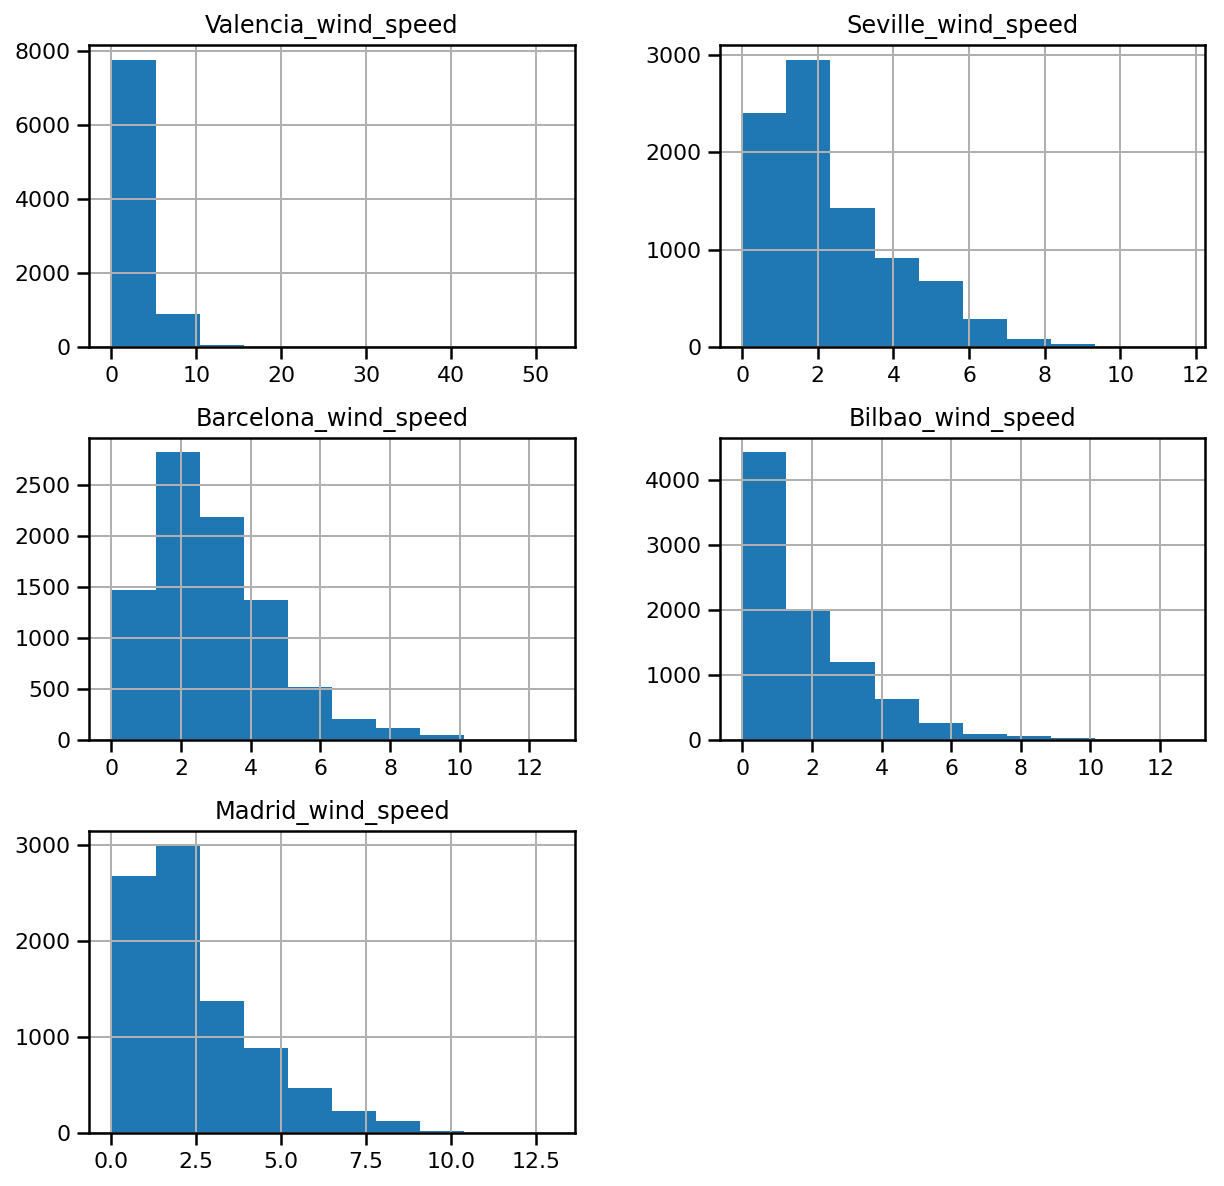

In [13]:
features = ['Valencia_wind_speed', 'Seville_wind_speed', 'Barcelona_wind_speed', 'Bilbao_wind_speed', 'Madrid_wind_speed'] # create a list of all numerical features
df[features].hist(figsize=(10,10));

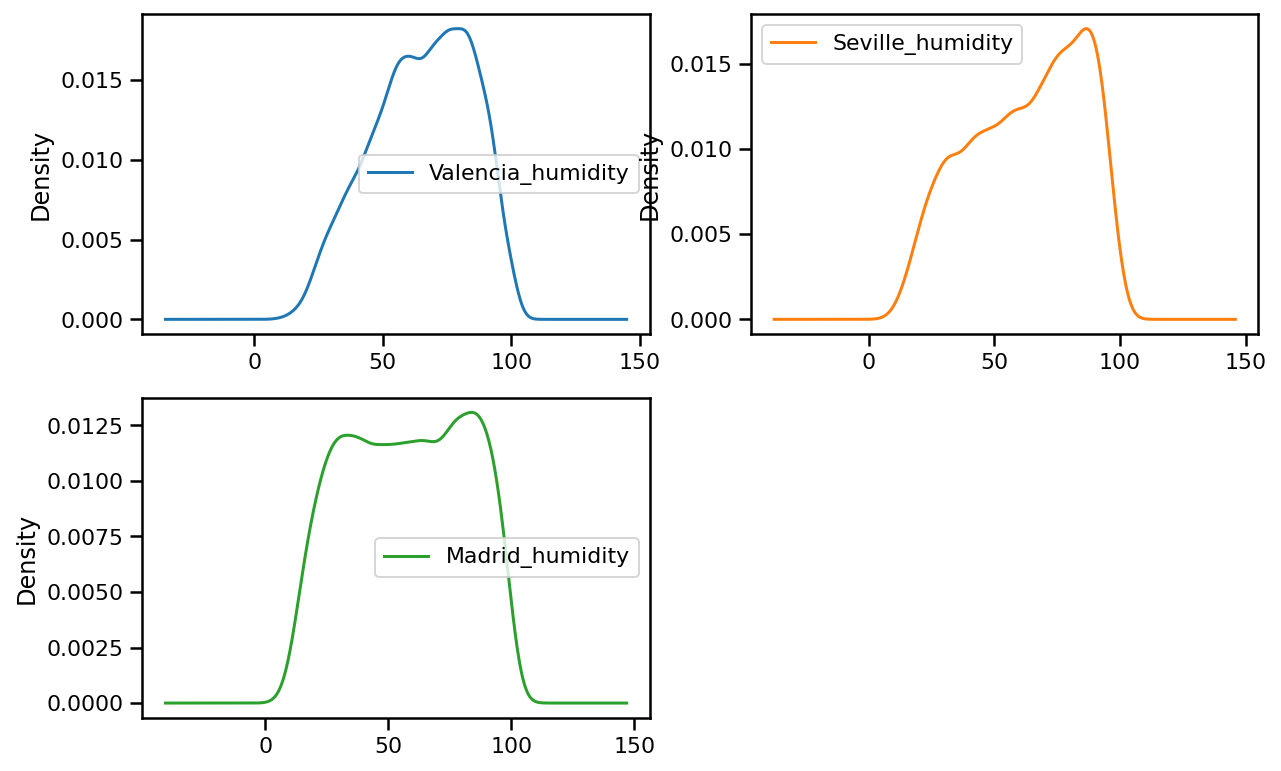

In [14]:
features2 = ['Valencia_humidity', 'Seville_humidity', 'Madrid_humidity']

df[features2].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

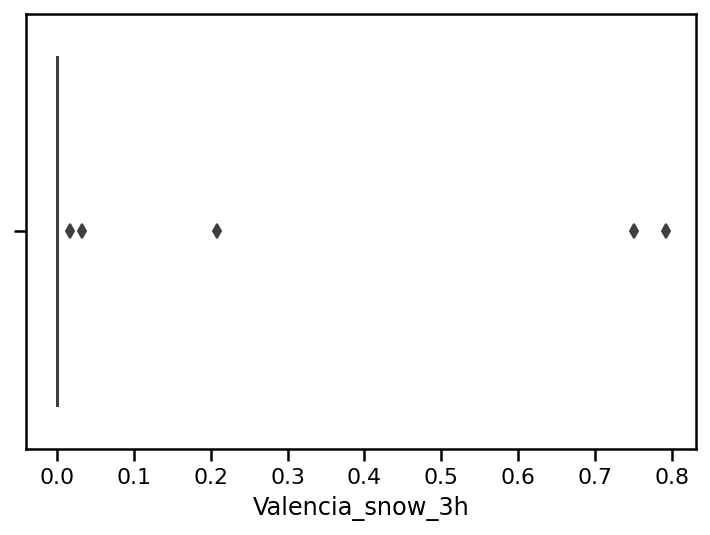

In [15]:
sns.boxplot(x='Valencia_snow_3h', data=df);

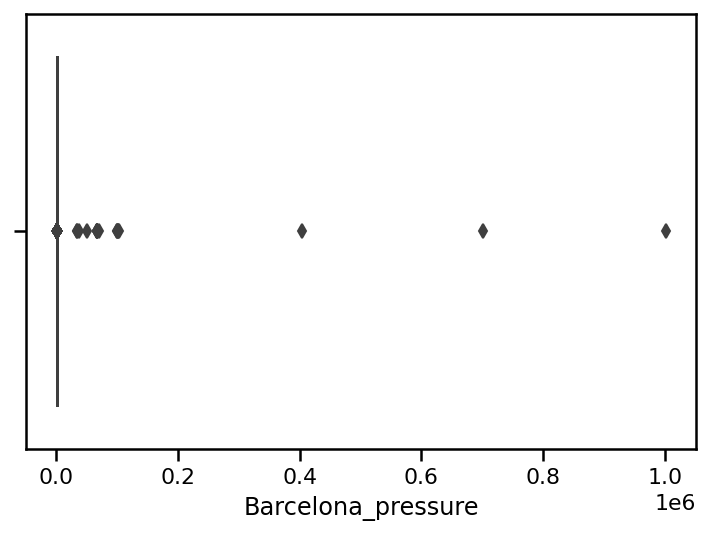

In [16]:
sns.boxplot(x='Barcelona_pressure', data=df);


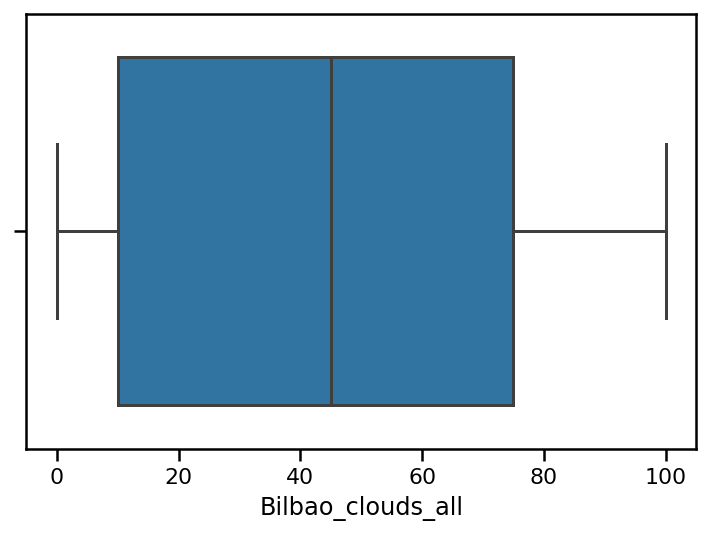

In [17]:

sns.boxplot(x='Bilbao_clouds_all', data=df);

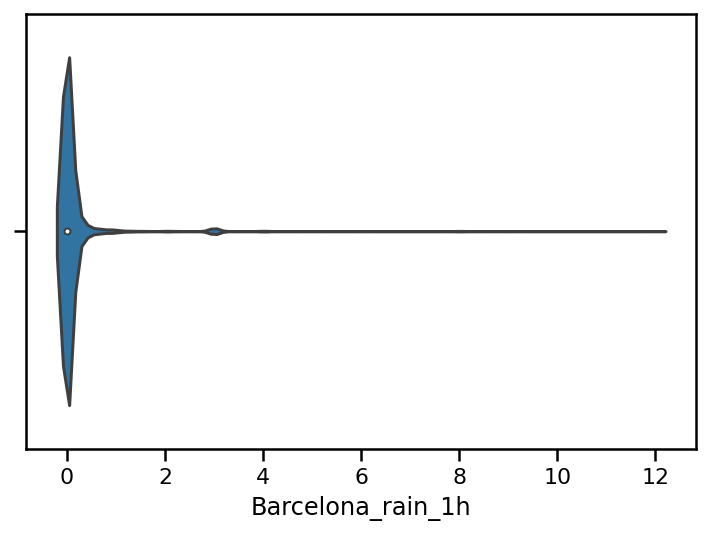

In [18]:
sns.violinplot(x='Barcelona_rain_1h', data=df);

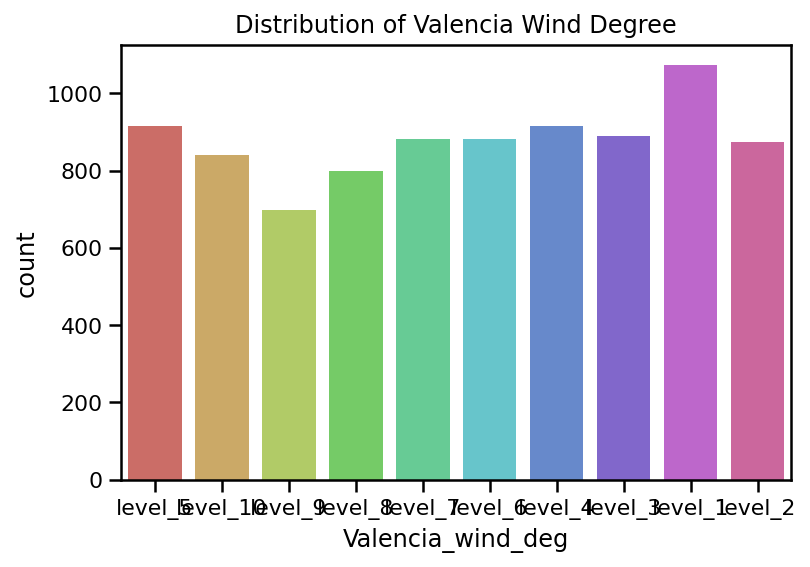

In [19]:
sns.countplot(x = 'Valencia_wind_deg', data = df, palette="hls")
plt.title("Distribution of Valencia Wind Degree");

In [20]:
#Ploting time against Load_shortfall_3h to see relationship
fig = px.line(df, y = df['load_shortfall_3h'], x =df['time'], width =900, height=400 )
fig.show()

## Multivariate Non-Graphical

In [21]:
df_corr = df.corr()

## Multivariate Analysis: Graphical


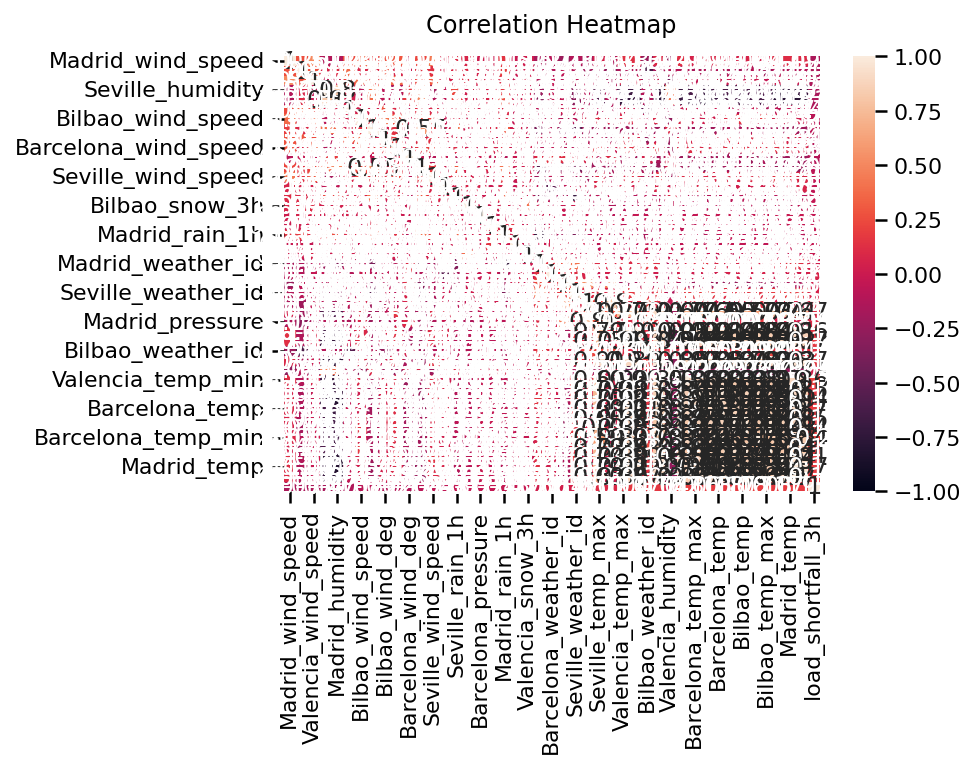

In [22]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

NameError: name 'plot_corr' is not defined

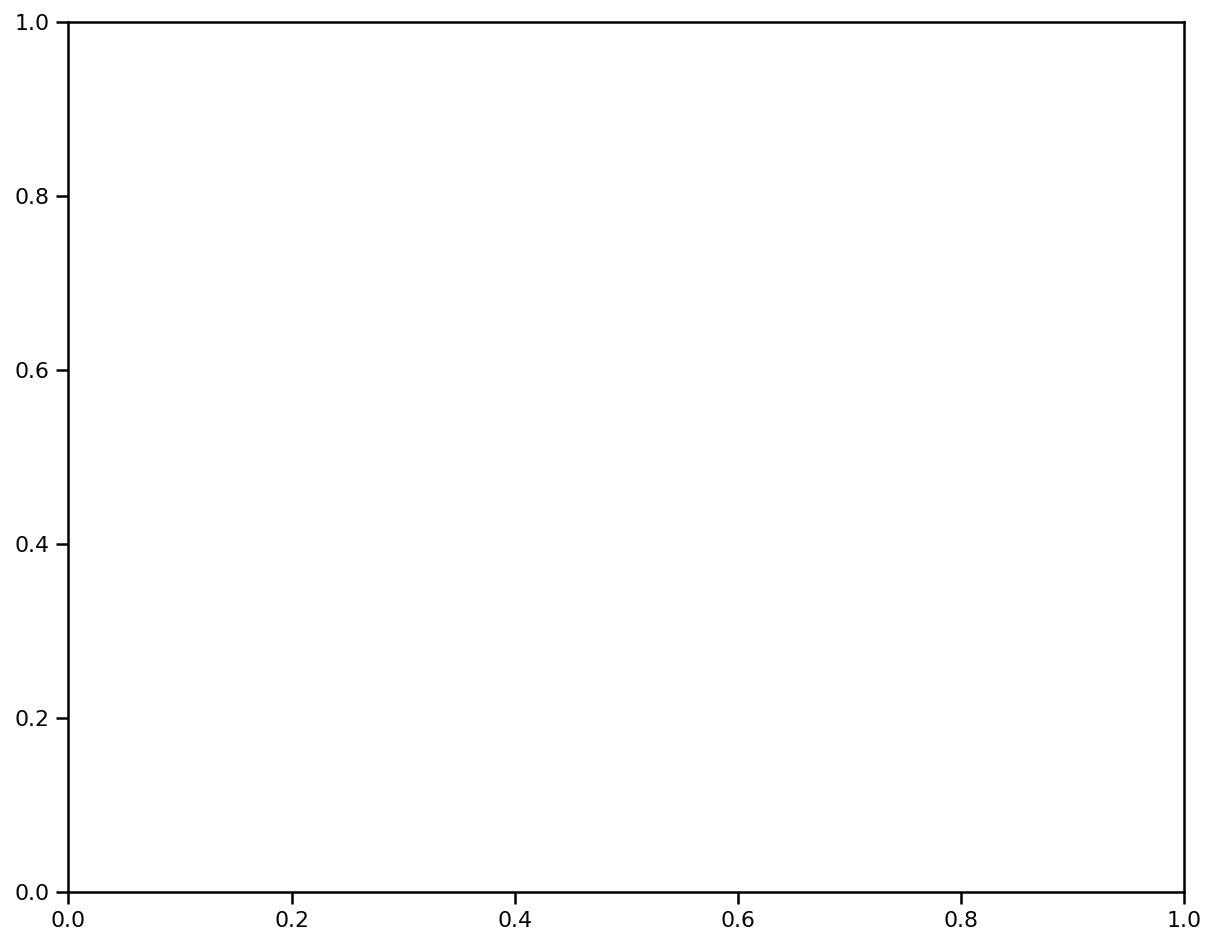

In [23]:
# Visualizing the correlation
fig = plt.figure(figsize=(10,8));
ax = fig.add_subplot(111);
plot_corr(train_data.corr(), xnames = train_data.corr().columns, ax = ax, );

In [44]:
df.corr()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
Madrid_wind_speed              1.000000           0.121835        0.259719   
Valencia_wind_deg              0.121835           1.000000        0.199288   
Bilbao_rain_1h                 0.259719           0.199288        1.000000   
Valencia_wind_speed            0.513092           0.292731        0.265864   
Seville_humidity              -0.117892           0.240007        0.069878   
Madrid_humidity               -0.137092           0.253549        0.106765   
Bilbao_clouds_all              0.244001           0.158266        0.370733   
Bilbao_wind_speed              0.377854           0.075864        0.085398   
Seville_clouds_all             0.191251           0.085519        0.081131   
Bilbao_wind_deg                0.270950           0.157252        0.279350   
Barcelona_wind_speed           0.294640           0.042795        0.069997   
Barcelona_wind_deg            -0.095380           0.151146       -0.030723   
Madrid_clouds_all              0.230126           0.105080        0.135524   
Seville_wind_speed             0.434104          -0.007258        0.140101   
Barcelona_rain_1h              0.062758           0.000699        0.052558   
Seville_pressure              -0.182792           0.274340        0.067471   
Seville_rain_1h                0.108413          -0.019783        0.092984   
Bilbao_snow_3h                 0.071183           0.069929        0.096730   
Barcelona_pressure             0.011134           0.026729        0.052458   
Seville_rain_3h                0.004795          -0.019602        0.016392   
Madrid_rain_1h                 0.150446          -0.017304        0.187423   
Barcelona_rain_3h             -0.014644           0.016777       -0.001412   
Valencia_snow_3h               0.021660           0.020481        0.008269   
Madrid_weather_id             -0.169358          -0.003746       -0.147768   
Barcelona_weather_id          -0.099582          -0.018537       -0.120618   
Bilbao_pressure               -0.231747          -0.099051       -0.054814   
Seville_weather_id            -0.120014           0.000478       -0.095723   
Valencia_pressure             -0.142737          -0.164502       -0.199341   
Seville_temp_max               0.050043          -0.328244       -0.210323   
Madrid_pressure               -0.136672          -0.189989       -0.298587   
Valencia_temp_max              0.133468          -0.245685       -0.135198   
Valencia_temp                  0.128726          -0.252334       -0.127953   
Bilbao_weather_id             -0.238128          -0.209860       -0.604616   
Seville_temp                   0.090861          -0.342016       -0.170009   
Valencia_humidity             -0.285787          -0.192267       -0.103868   
Valencia_temp_min              0.119657          -0.255626       -0.116835   
Barcelona_temp_max             0.061854          -0.260643       -0.157326   
Madrid_temp_max                0.091464          -0.341696       -0.148397   
Barcelona_temp                 0.080133          -0.260622       -0.138901   
Bilbao_temp_min                0.077330          -0.265992       -0.141269   
Bilbao_temp                    0.060467          -0.283031       -0.182494   
Barcelona_temp_min             0.089992          -0.240981       -0.106593   
Bilbao_temp_max                0.042114          -0.292904       -0.219871   
Seville_temp_min               0.110278          -0.311775       -0.120575   
Madrid_temp                    0.109572          -0.337965       -0.135927   
Madrid_temp_min                0.098138          -0.316603       -0.116431   
load_shortfall_3h             -0.150981          -0.188674       -0.152510   
Year                          -0.031553          -0.057513       -0.200747   
Month                         -0.237445          -0.140195       -0.188274   
Day                           -0.029954          -0.010627        0.072752   
Hour                           0.186228     

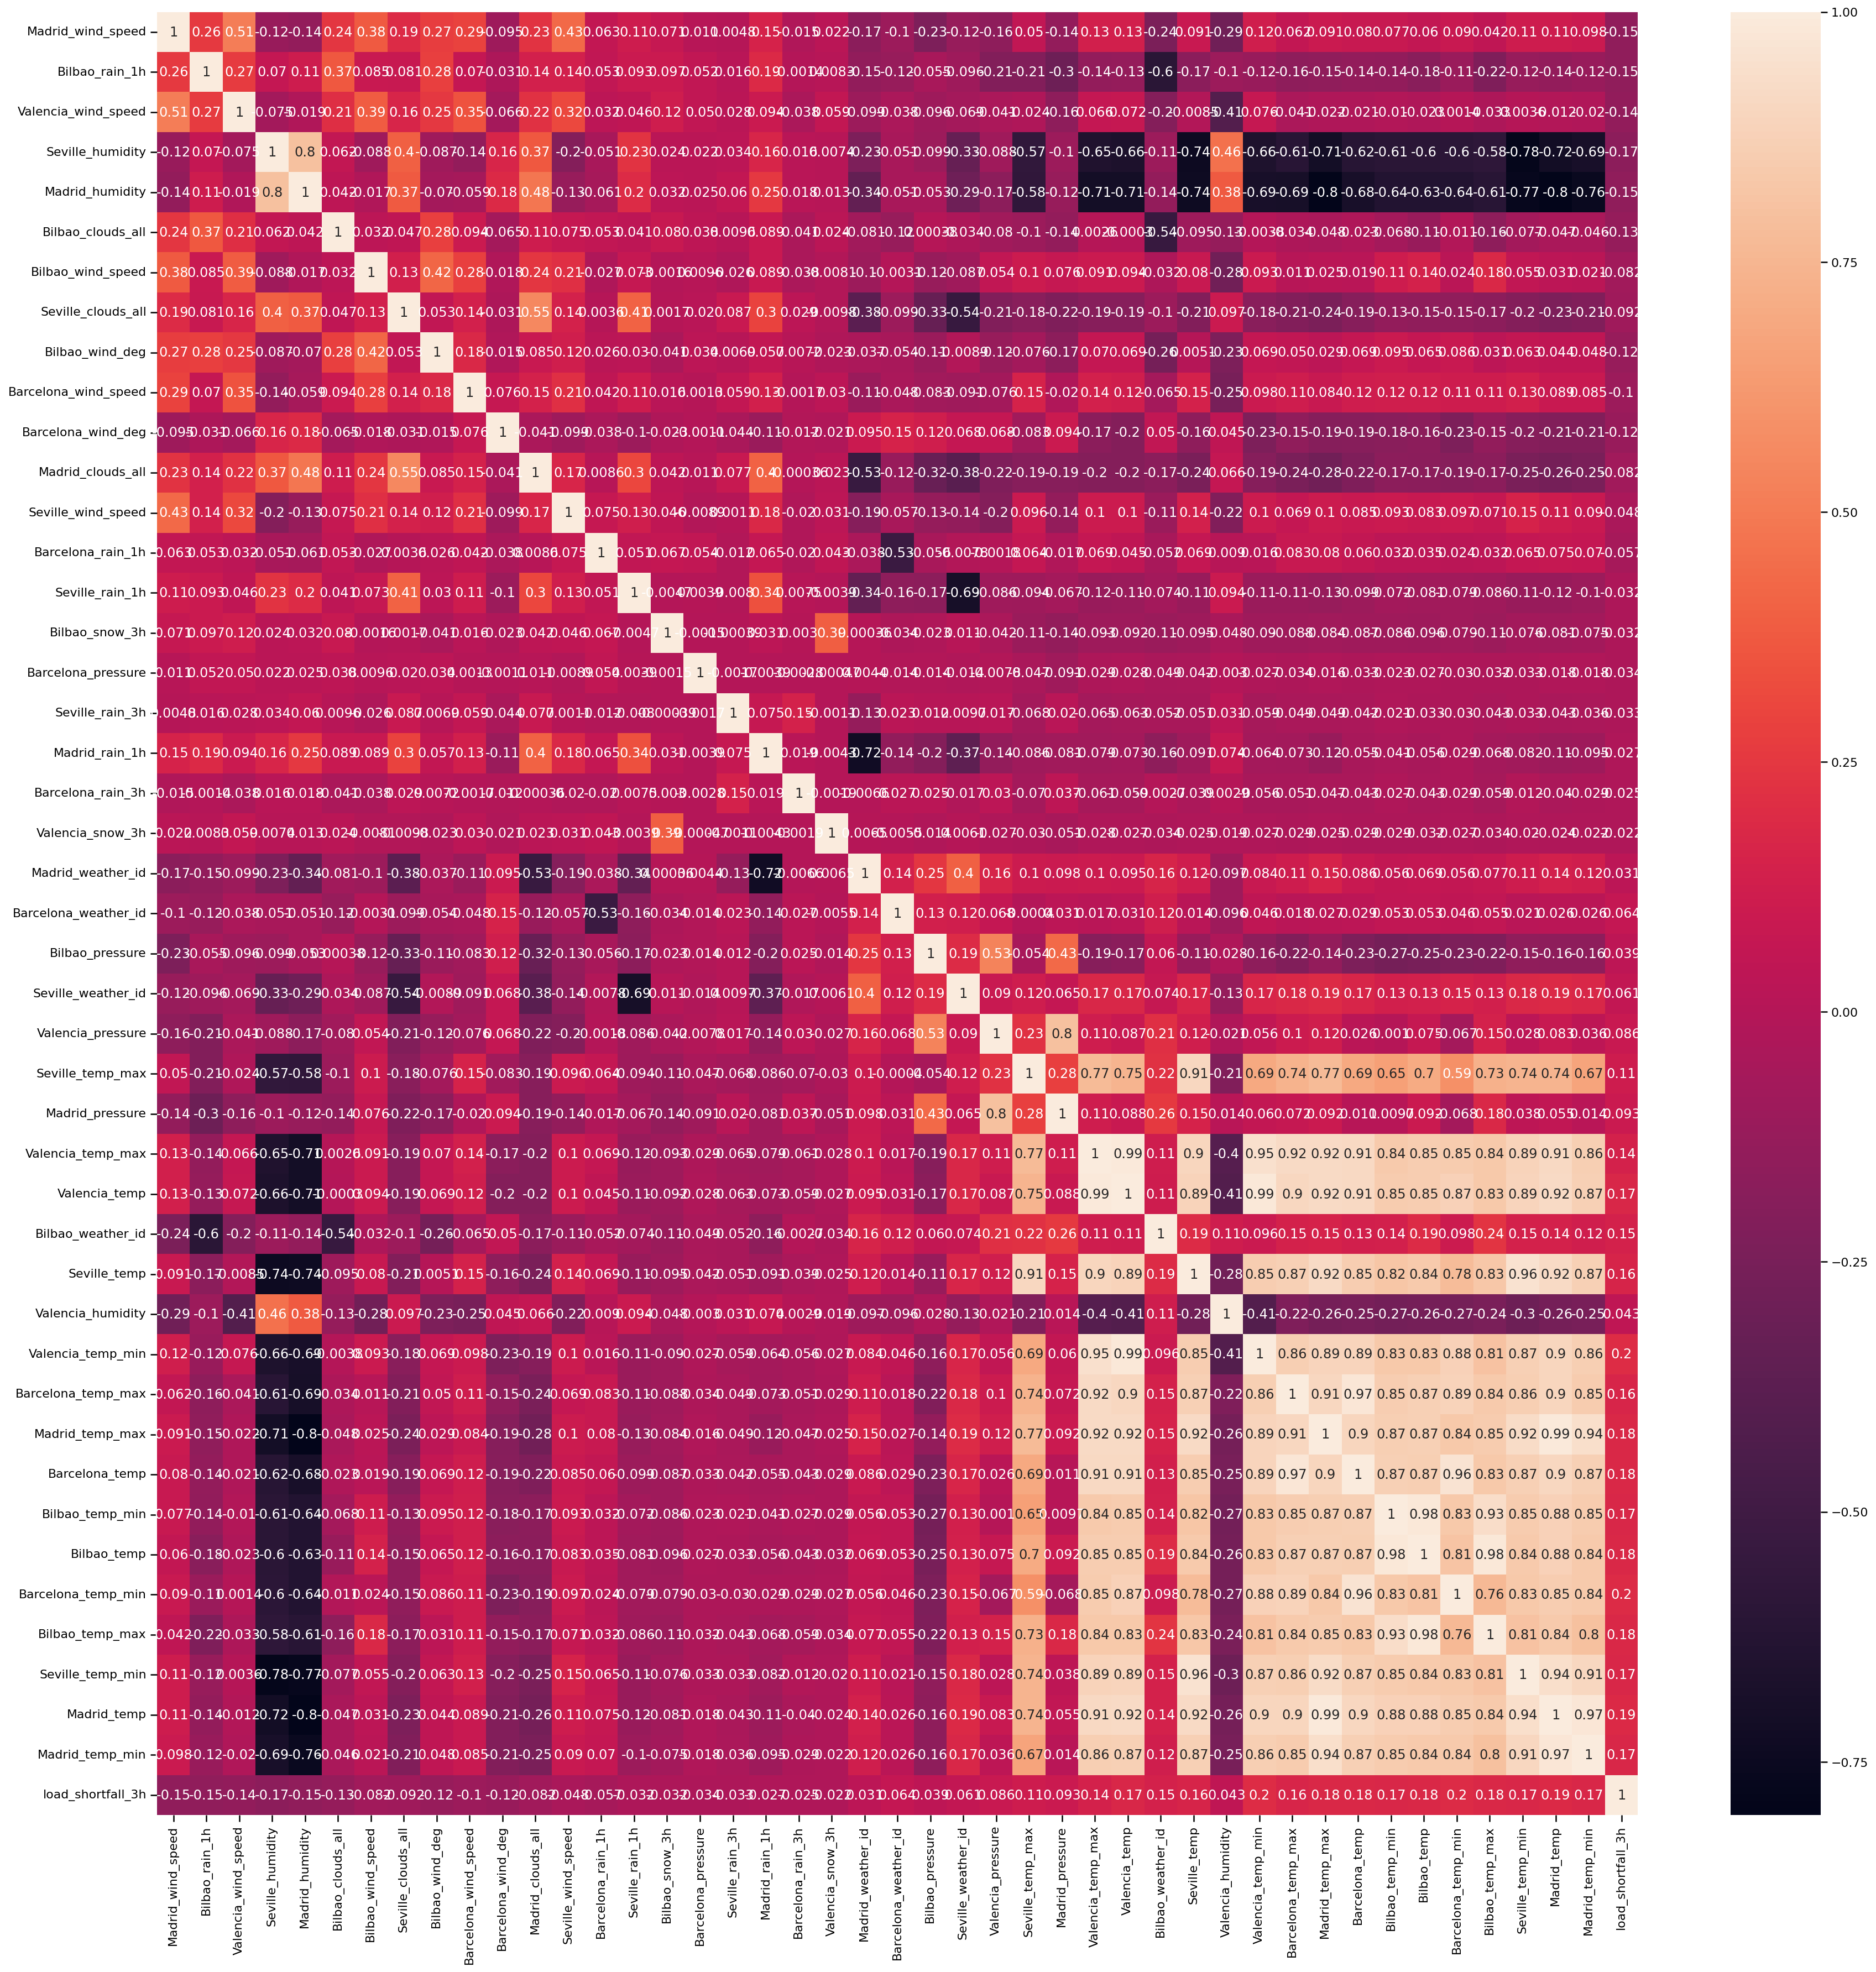

In [24]:
# evaluate correlation
plt.figure(figsize= (30,30))
sns.heatmap(df.corr(), annot=True);

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
Outliers
rescale
standardized
normalize
features selection

In [25]:
# remove missing values/ features
# fill the missing value in Valencia_pressure with the mean, which is 1012.

df.fillna(df.Valencia_pressure.mean(), inplace= True)

In [26]:
df.Seville_pressure = df.Seville_pressure.str[2:]

In [27]:
df['Seville_pressure'] = df['Seville_pressure'].astype(int)

In [28]:
# create new features

In [29]:
df.Seville_pressure.unique()

array([25, 23, 24, 21, 16,  9, 15, 19, 22, 11,  8,  4,  6, 13, 17, 20, 18,
       14, 12,  5, 10,  7,  3,  2,  1])

In [30]:
df.Valencia_wind_deg = df.Valencia_wind_deg.str[6:]

In [31]:
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].astype(int)

In [32]:
df.Valencia_wind_deg.unique()

array([ 5, 10,  9,  8,  7,  6,  4,  3,  1,  2])

In [33]:
# The time is in 'Object' dtype, to change the data type into datetime 
df["time"] = pd.to_datetime(df["time"])

In [34]:
# Extract the date and time into individual components, this will be useful for some visualization
df['Year'] = df['time'].dt.year
df['Month'] = df['time'].dt.month
df['Day'] = df['time'].dt.day
df['Hour'] = df['time'].dt.hour
df['Minutes'] = df['time'].dt.minute
df['Seconds'] = df['time'].dt.second


In [35]:
df.head()

time  Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
0 2015-01-01 03:00:00           0.666667                  5             0.0   
1 2015-01-01 06:00:00           0.333333                 10             0.0   
2 2015-01-01 09:00:00           1.000000                  9             0.0   
3 2015-01-01 12:00:00           1.000000                  8             0.0   
4 2015-01-01 15:00:00           1.000000                  7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0           1.000000                 0.0       223.333333   
1           1.000000                 0.0       221.000000   
2           1.000000                 0.0       214.333333   
3           1.000000                 0.0       199.666667   
4           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0                25              0.0   
1            3.333333                0.0                25              0.0   
2            2.666667                0.0                25              0.0   
3            4.000000                0.0                25              0.0   
4            3.000000                0.0                25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4        1012.051407        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     269.888000              800.0    274.254667          75.666667   
1     271.72

In [36]:
df.Year.unique()

array([2015, 2016, 2017])

In [37]:
'''def remove_pp_outliers(df):
    df_out = pd.DataFrame()
    for key, subt in df.groupby('location'):
        m = np.mean(subt.price_per_sqft)
        st = np.std(subt.price_per_sqft)
        reduce_df = subt[(subt['price_per_sqft'] > (m - st)) & (subt["price_per_sqft"]<(m + st))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    return df_out
df = remove_pp_outliers(df)'''

'def remove_pp_outliers(df):\n    df_out = pd.DataFrame()\n    for key, subt in df.groupby(\'location\'):\n        m = np.mean(subt.price_per_sqft)\n        st = np.std(subt.price_per_sqft)\n        reduce_df = subt[(subt[\'price_per_sqft\'] > (m - st)) & (subt["price_per_sqft"]<(m + st))]\n        df_out = pd.concat([df_out, reduce_df], ignore_index=True)\n    return df_out\ndf = remove_pp_outliers(df)'

In [38]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
improving the model by using lasso and Ridge


In [39]:
# split data
X = df.drop(['time','Minutes','Seconds','load_shortfall_3h'], axis=1)
y= df['load_shortfall_3h']

In [40]:
# create targets and features dataset
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=101)

In [41]:
# create one or more ML models
lmreg = LinearRegression()

In [42]:
# Fit the multiple lines on the data points and returns the line that
# results in the least error

lmreg.fit(X_train, y_train)

LinearRegression()

In [43]:
lmreg.score(X_test, y_test)

0.1694035335034796

In [49]:
metrics.mean_squared_error(y_test,predict)

NameError: name 'metrics' is not defined

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic